In [ ]:
import matplotlib.pyplot as plt

LH = [0.25, 0.5, 1, 2, 4]
Ra_cr = [450000, 330000, 5250, 2750, 1950]

plt.plot(LH, Ra_cr)
plt.scatter(LH, Ra_cr)
plt.xlabel("L/H")
plt.ylabel("Ra")

plt.title("Зависимость $Ra_{кр}$ от геометрических размеров")




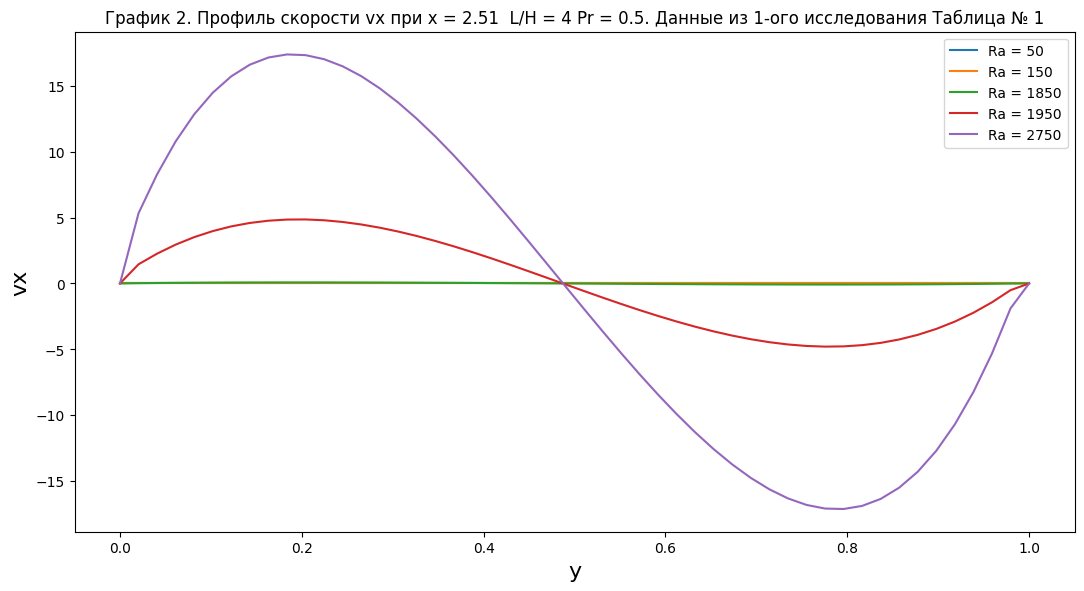

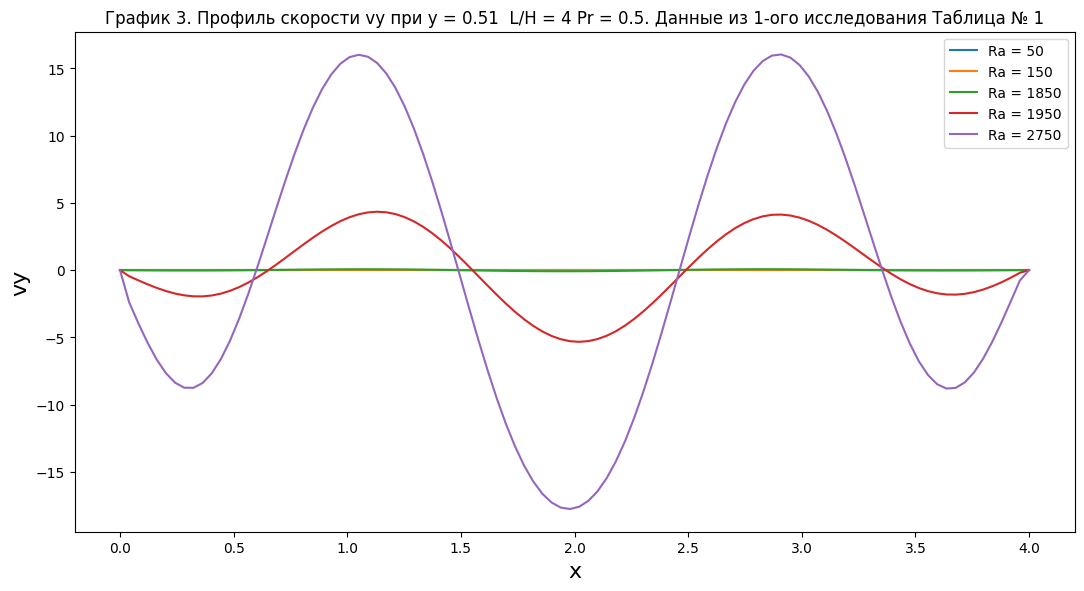

In [30]:
import numpy as np
import matplotlib.pyplot as plt

base_path_vx = "vx/Vx"
base_path_vy = "vy/Vy"
base_path_T = "T/T"

def GenPath(size, base_path):
    return [base_path + str(i) + ".dat" for i in range(1, size+1)]

# Получаем Данные для построени графиков vx(x_0, y)
# Профиль скорости. выбираем x_0 = 2.5 - середина 
def DataVx(file_vx, x_0 = 2.505050505051):
    eps = 1e-10
    file = open(file_vx, 'r')
    datas_all = [np.float64(data.strip().split()) for data in file.readlines()]

    # Формат строчки x y vx
    Data = {'y': [], 'vx': [], 'x0': x_0}

    for data in datas_all:
        if np.abs(data[0] - x_0) <= eps:
            Data['y'].append(data[1])
            Data['vx'].append(data[2])


    file.close()

    return Data

def DataVy(file_vy, y_0 = 0.5102040816327):
    eps = 1e-10
    Data = {'x': [], 'vy': [], 'y0': y_0}
    file = open(file_vy, 'r')
    datas_all = [np.float64(data.strip().split()) for data in file.readlines()]

    for data in datas_all:
        if np.abs(data[1] - y_0) <= eps:
            Data['x'].append(data[0])
            Data['vy'].append(data[2])
    file.close()
    return Data

def DataTy(file_T, x0):
    eps = 1e-10
    Data = {'y': [], 'T': [], 'x0': x0}

    file = open(file_T, 'r')
    datas_all = [np.float64(data.strip().split()) for data in file.readlines()]

    for data in datas_all:
        if np.abs(data[0] - x0) <= eps:
            Data['y'].append(data[1])
            Data['T'].append(data[2])
    file.close()
    return Data



def PlotGraph(Datas,keyx, keyy, labels, title, xlabel, ylabel):

 
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([1,1,1,1])

    for data in Datas:    
        ax.plot(data[keyx], data[keyy])


    ax.set_title(title)
    ax.set_xlabel(xlabel, size = 16)
    ax.set_ylabel(ylabel, size = 16)
    ax.legend(labels = labels)

    plt.show()




# Пути
path_vx = GenPath(5, base_path_vx)
path_vy = GenPath(5, base_path_vy)
path_T = GenPath(5, base_path_T)

# Координаты x нисходящего, центрального и нисходящего 3-его конвективного вала 
x3_convvall = [2.020202020202, 2.505050505051, 3.030303030303]

# Компоненты скорости 
DatasVx = [DataVx(path_vx_i) for path_vx_i in path_vx]
DatasVy = [DataVy(path_vy_i) for path_vy_i in path_vy]

# Изменение температуры в 3-ем конвективном вале при различных числах Релея 
DatasT_Ra1875 = [DataTy(path_T[2], xi) for xi in x3_convvall]
DatasT_Ra1950 = [DataTy(path_T[3], xi) for xi in x3_convvall]
DatasT_Ra2750 = [DataTy(path_T[4], xi) for xi in x3_convvall]

PlotGraph(DatasVx, 
        'y',
        'vx',
        ["Ra = 50", "Ra = 150", "Ra = 1850", "Ra = 1950", "Ra = 2750"], 
        "График 2. Профиль скорости vx при x = " + str(np.round(DatasVx[0]['x0'], 2)) + "  L/H = 4 Pr = 0.5. Данные из 1-ого исследования Таблица № 1" ,
        "y",
        "vx")

PlotGraph(DatasVy, 
        'x',
        'vy',
        ["Ra = 50", "Ra = 150", "Ra = 1850", "Ra = 1950", "Ra = 2750"], 
        "График 3. Профиль скорости vy при y = " + str(np.round(DatasVy[0]['y0'], 2)) + "  L/H = 4 Pr = 0.5. Данные из 1-ого исследования Таблица № 1" ,
        "x",
        "vy")




